# REDES NEURONALES

---



Se utiliza una red neuronal para clasificar imágenes de prendas de ropa. Para ello, se emplea Keras con TensorFlow.

El dataset a utilizar es Fashion MNIST, un problema sencillo con imágenes pequeñas de ropa, pero más interesante que el dataset de MNIST. Puedes consultar más información sobre el dataset en [este enlace](https://github.com/zalandoresearch/fashion-mnist).


In [2]:
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

import matplotlib.pyplot as plt

En primer lugar vamos a importar el dataset Fashion MNIST

In [3]:
mnist = tf.keras.datasets.fashion_mnist

Llamar a **load_data** en este dataset nos dará dos conjuntos de dos listas, estos serán los valores de entrenamiento y prueba para los gráficos que contienen las prendas de vestir y sus etiquetas.

In [4]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

Antes de continuar vamos a dar un vistazo a nuestro dataset, para ello vamos a ver una imagen de entrenamiento y su etiqueta o clase.

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

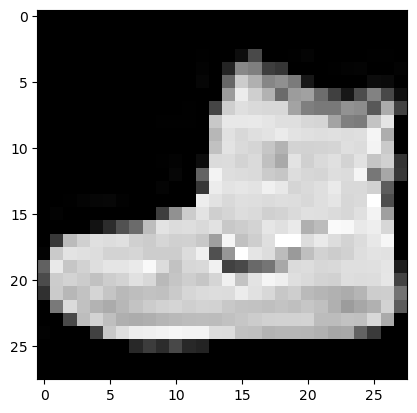

In [5]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[0], cmap="gray") # recordad que siempre es preferible trabajar en blanco y negro
#
print(training_labels[0])
print(training_images[0])

In [6]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

## 1. Información sobre el dataset

In [7]:
print("Número de imágenes de training:", len(training_images))
print("Número de imágenes de test:", len(test_images))
print("Tamaño de las imágenes:", training_images[0].shape)

Número de imágenes de training: 60000
Número de imágenes de test: 10000
Tamaño de las imágenes: (28, 28)


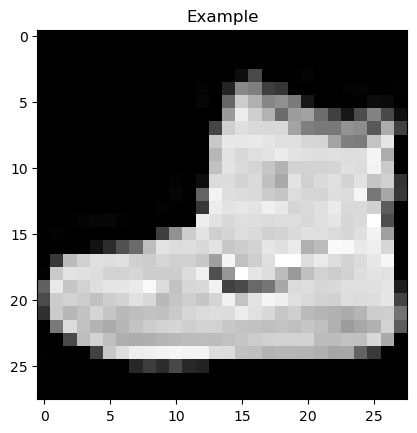

In [8]:
plt.imshow(training_images[0], cmap='gray')
plt.title("Example")
plt.show()

Cada imagen almacena un total de 784 (28x28) valores que representan cada uno de los píxeles de la imagen. Estos valores están comprendidos entre 0 y 1, ya que los hemos normalizado, y representan el color que ha sido asociado a cada píxel (0 negro, 1 blanco).

y representará la clase, desde 0 hasta 9, que es asociada a cada imagen del conjunto de datos.

## 2. Creación del Modelo

In [9]:
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam


# Definir el modelo de red neuronal
model = Sequential([
    # Capa para convertir la imagen en un vector
    Flatten(input_shape=(28, 28)),
    # Capa con 128 unidades y función de activación sigmoid
    Dense(128, activation='sigmoid'),
    # Capa de salida con 10 unidades y función de activación softmax
    Dense(10, activation='softmax')
])

# Compilar el modelo
# Uso de optimizador Adam
model.compile(optimizer='adam',        
    # Loss para clasificación multiclase de enteros
    loss='sparse_categorical_crossentropy',       
    # Métrica para evaluar accuracy
    metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(training_images, training_labels,             
    # Número de epochs
    epochs=10,               
    # Tamaño del batch
    batch_size=64,      
    validation_data=(test_images, test_labels))

# Imprimir resultados de loss y accuracy por cada epoch
print("Resultados: ")
print(history.history)



Epoch 1/10


938/938 [==============================] - 1s 1ms/step - loss: 0.6007 - accuracy: 0.7999 - val_loss: 0.4628 - val_accuracy: 0.8352
Epoch 2/10
938/938 [==============================] - 1s 953us/step - loss: 0.4133 - accuracy: 0.8525 - val_loss: 0.4194 - val_accuracy: 0.8476
Epoch 3/10
938/938 [==============================] - 1s 950us/step - loss: 0.3729 - accuracy: 0.8662 - val_loss: 0.4049 - val_accuracy: 0.8520
Epoch 4/10
938/938 [==============================] - 1s 953us/step - loss: 0.3500 - accuracy: 0.8742 - val_loss: 0.3753 - val_accuracy: 0.8665
Epoch 5/10
938/938 [==============================] - 1s 954us/step - loss: 0.3311 - accuracy: 0.8808 - val_loss: 0.3648 - val_accuracy: 0.8688
Epoch 6/10
938/938 [==============================] - 1s 951us/step - loss: 0.3144 - accuracy: 0.8858 - val_loss: 0.3616 - val_accuracy: 0.8694
Epoch 7/10
938/938 [==============================] - 1s 949us/step - loss: 0.3022 - accuracy: 0.8899 - val_loss: 0.3513 - val_accurac

In [10]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print("Loss en datos de prueba:", test_loss)
print("Accuracy en datos de prueba:", test_accuracy)


313/313 [==============================] - 0s 560us/step - loss: 0.3321 - accuracy: 0.8811
Loss en datos de prueba: 0.33207497000694275
Accuracy en datos de prueba: 0.8810999989509583


## 3: Funcionamiento de las predicción de la red neuronal


In [ ]:
classifications = model.predict(test_images)

print("Primera entrada:", classifications[0])

El resultado es un vector de números ya que la función predict devuelve las probabilidades que tiene una imagen de pertenecer a cada una de las clases. Por ejemplo, si el vector es empieza por 0.9, tendrá un 90% de probabilidad de pertenecer a la clase 0.

La clase de la primera entrada es la clase 9, ya que es la que muestra una mayor probabilidad.

# **4: Impacto variar el número de neuronas en las capas ocultas**


In [12]:

from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam


# Definir el modelo de red neuronal
model = Sequential([
    # Capa para convertir la imagen en un vector
    Flatten(input_shape=(28, 28)),
    # Capa con 512 unidades y función de activación sigmoid
    Dense(512, activation='sigmoid'),
    # Capa de salida con 10 unidades y función de activación softmax
    Dense(10, activation='softmax')
])

# Compilar el modelo
# Uso de optimizador Adam
model.compile(optimizer='adam',        
    # Loss para clasificación multiclase de enteros
    loss='sparse_categorical_crossentropy',       
    # Métrica para evaluar accuracy
    metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(training_images, training_labels,             
    # Número de epochs
    epochs=10,               
    # Tamaño del batch
    batch_size=64,      
    validation_data=(test_images, test_labels))

# Imprimir resultados de loss y accuracy por cada epoch
print("Resultados: ")
print(history.history)

Epoch 1/10
938/938 [==============================] - 1s 1ms/step - loss: 0.5306 - accuracy: 0.8138 - val_loss: 0.4727 - val_accuracy: 0.8264
Epoch 2/10
938/938 [==============================] - 1s 1ms/step - loss: 0.4048 - accuracy: 0.8528 - val_loss: 0.4159 - val_accuracy: 0.8493
Epoch 3/10
938/938 [==============================] - 1s 1ms/step - loss: 0.3640 - accuracy: 0.8687 - val_loss: 0.3931 - val_accuracy: 0.8584
Epoch 4/10
938/938 [==============================] - 1s 1ms/step - loss: 0.3388 - accuracy: 0.8759 - val_loss: 0.3860 - val_accuracy: 0.8595
Epoch 5/10
938/938 [==============================] - 1s 1ms/step - loss: 0.3151 - accuracy: 0.8854 - val_loss: 0.3883 - val_accuracy: 0.8594
Epoch 6/10
938/938 [==============================] - 1s 1ms/step - loss: 0.2988 - accuracy: 0.8899 - val_loss: 0.3540 - val_accuracy: 0.8731
Epoch 7/10
938/938 [==============================] - 1s 1ms/step - loss: 0.2827 - accuracy: 0.8958 - val_loss: 0.3519 - val_accuracy: 0.8724
Epoch 

In [13]:
classifications = model.predict(test_images)

print("Primera entrada:", classifications[0])

313/313 [==============================] - 0s 558us/step
Primera entrada: [5.2959291e-07 7.5083896e-08 1.9421435e-07 5.2169071e-07 9.7539976e-07 5.5408771e-03 5.1135380e-06 1.2401616e-02 1.2856449e-05 9.8203719e-01]


In [14]:
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam


# Definir el modelo de red neuronal
model = Sequential([
    # Capa para convertir la imagen en un vector
    Flatten(input_shape=(28, 28)),
    # Capa con 1024 unidades y función de activación sigmoid
    Dense(1024, activation='sigmoid'),
    # Capa de salida con 10 unidades y función de activación softmax
    Dense(10, activation='softmax')
])

# Compilar el modelo
# Uso de optimizador Adam
model.compile(optimizer='adam',        
    # Loss para clasificación multiclase de enteros
    loss='sparse_categorical_crossentropy',       
    # Métrica para evaluar accuracy
    metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(training_images, training_labels,             
    # Número de epochs
    epochs=10,               
    # Tamaño del batch
    batch_size=64,      
    validation_data=(test_images, test_labels))

# Imprimir resultados de loss y accuracy por cada epoch
print("Resultados: ")
print(history.history)

Epoch 1/10
938/938 [==============================] - 2s 2ms/step - loss: 0.5308 - accuracy: 0.8104 - val_loss: 0.4478 - val_accuracy: 0.8406
Epoch 2/10
938/938 [==============================] - 1s 2ms/step - loss: 0.4001 - accuracy: 0.8550 - val_loss: 0.4034 - val_accuracy: 0.8574
Epoch 3/10
938/938 [==============================] - 1s 2ms/step - loss: 0.3621 - accuracy: 0.8677 - val_loss: 0.4217 - val_accuracy: 0.8482
Epoch 4/10
938/938 [==============================] - 1s 2ms/step - loss: 0.3353 - accuracy: 0.8758 - val_loss: 0.3737 - val_accuracy: 0.8649
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3102 - accuracy: 0.8857 - val_loss: 0.3597 - val_accuracy: 0.8694
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2925 - accuracy: 0.8926 - val_loss: 0.3633 - val_accuracy: 0.8682
Epoch 7/10
938/938 [==============================] - 1s 2ms/step - loss: 0.2805 - accuracy: 0.8963 - val_loss: 0.3341 - val_accuracy: 0.8801
Epoch 

In [15]:
classifications = model.predict(test_images)

print("Primera entrada:", classifications[0])

313/313 [==============================] - 0s 603us/step
Primera entrada: [1.4259929e-07 7.1637101e-09 2.3178524e-08 3.0774023e-09 1.7347080e-07 2.6006092e-04 6.1719959e-07 2.1238767e-03 4.3484199e-08 9.9761510e-01]


Si se aumenta el número de neuronas puede llegar a mejorarse el rendimiento del modelo. Sin embargo, si se aumenta demasiado puede llevar al sobreajuste y perder capacidad de generalización.

Observamos como siguen clasificando la primera prenda en la clase 9. Vemos como al aumentar el número de neuronas ha aumentado la accuracy.

Esto puede haber ocurrido debido a un mejor rendimiento del modelo por aumentar el número de neuronas de la capa oculta.

# **5: Capa Flatten**

In [16]:
from tensorflow.keras.optimizers import Adam


# Definir el modelo de red neuronal
model = Sequential([
    # Capa con 128 unidades y función de activación sigmoid
    Dense(128, activation='sigmoid', input_shape=(28, 28)),
    # Capa de salida con 10 unidades y función de activación softmax
    Dense(10, activation='softmax')
])

# Compilar el modelo
# Uso de optimizador Adam
model.compile(optimizer='adam',        
    # Loss para clasificación multiclase de enteros
    loss='sparse_categorical_crossentropy',       
    # Métrica para evaluar accuracy
    metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(training_images, training_labels,             
    # Número de epochs
    epochs=10,               
    # Tamaño del batch
    batch_size=64,      
    validation_data=(test_images, test_labels))

# Imprimir resultados de loss y accuracy por cada epoch
print("Resultados: ")
print(history.history)

Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\manup\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Users\manup\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance

  File "C:\Users\manup\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 701, in start

  File "C:\Users\manup\AppData\Roaming\Python\Python311\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "C:\Users\manup\anaconda3\Lib\asyncio\windows_events.py", line 321, in run_forever

  File "C:\Users\manup\anaconda3\Lib\asyncio\base_events.py", line 607, in run_forever

  File "C:\Users\manup\anaconda3\Lib\asyncio\base_events.py", line 1922, in _run_once

  File "C:\Users\manup\anaconda3\Lib\asyncio\events.py", line 80, in _run

  File "C:\Users\manup\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 534, in dispatch_queue

  File "C:\Users\manup\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 523, in process_one

  File "C:\Users\manup\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 429, in dispatch_shell

  File "C:\Users\manup\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 767, in execute_request

  File "C:\Users\manup\AppData\Roaming\Python\Python311\site-packages\ipykernel\ipkernel.py", line 429, in do_execute

  File "C:\Users\manup\AppData\Roaming\Python\Python311\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "C:\Users\manup\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3051, in run_cell

  File "C:\Users\manup\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3106, in _run_cell

  File "C:\Users\manup\AppData\Roaming\Python\Python311\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\manup\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3311, in run_cell_async

  File "C:\Users\manup\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3493, in run_ast_nodes

  File "C:\Users\manup\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code

  File "C:\Users\manup\AppData\Local\Temp\ipykernel_18452\3707325297.py", line 23, in <module>

  File "C:\Users\manup\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\manup\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1807, in fit

  File "C:\Users\manup\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1401, in train_function

  File "C:\Users\manup\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1384, in step_function

  File "C:\Users\manup\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1373, in run_step

  File "C:\Users\manup\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1151, in train_step

  File "C:\Users\manup\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1209, in compute_loss

  File "C:\Users\manup\anaconda3\Lib\site-packages\keras\src\engine\compile_utils.py", line 277, in __call__

  File "C:\Users\manup\anaconda3\Lib\site-packages\keras\src\losses.py", line 143, in __call__

  File "C:\Users\manup\anaconda3\Lib\site-packages\keras\src\losses.py", line 270, in call

  File "C:\Users\manup\anaconda3\Lib\site-packages\keras\src\losses.py", line 2454, in sparse_categorical_crossentropy

  File "C:\Users\manup\anaconda3\Lib\site-packages\keras\src\backend.py", line 5775, in sparse_categorical_crossentropy

logits and labels must have the same first dimension, got logits shape [1792,10] and labels shape [64]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_145087]

El **error** es debido a que se espera unos datos de entrada de una dimensión, y los datos de entrada que se están introduciendo en esta red neuronal son de imágenes de dos dimensiones 28x28. Para realizar esta transformación se utiliza la capa Flatten.

# **6: Número de neuronas de la capa de salida**


In [18]:
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam


# Definir el modelo de red neuronal
model = Sequential([
    # Capa para convertir la imagen en un vector
    Flatten(input_shape=(28, 28)),
    # Capa con 128 unidades y función de activación sigmoid
    Dense(128, activation='sigmoid'),
    # Capa de salida con 10 unidades y función de activación softmax
    Dense(5, activation='softmax')
])

# Compilar el modelo
# Uso de optimizador Adam
model.compile(optimizer='adam',        
    # Loss para clasificación multiclase de enteros
    loss='sparse_categorical_crossentropy',       
    # Métrica para evaluar accuracy
    metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(training_images, training_labels,             
    # Número de epochs
    epochs=10,               
    # Tamaño del batch
    batch_size=64,      
    validation_data=(test_images, test_labels))

# Imprimir resultados de loss y accuracy por cada epoch
print("Resultados: ")
print(history.history)

Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\manup\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Users\manup\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance

  File "C:\Users\manup\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 701, in start

  File "C:\Users\manup\AppData\Roaming\Python\Python311\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "C:\Users\manup\anaconda3\Lib\asyncio\windows_events.py", line 321, in run_forever

  File "C:\Users\manup\anaconda3\Lib\asyncio\base_events.py", line 607, in run_forever

  File "C:\Users\manup\anaconda3\Lib\asyncio\base_events.py", line 1922, in _run_once

  File "C:\Users\manup\anaconda3\Lib\asyncio\events.py", line 80, in _run

  File "C:\Users\manup\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 534, in dispatch_queue

  File "C:\Users\manup\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 523, in process_one

  File "C:\Users\manup\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 429, in dispatch_shell

  File "C:\Users\manup\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 767, in execute_request

  File "C:\Users\manup\AppData\Roaming\Python\Python311\site-packages\ipykernel\ipkernel.py", line 429, in do_execute

  File "C:\Users\manup\AppData\Roaming\Python\Python311\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "C:\Users\manup\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3051, in run_cell

  File "C:\Users\manup\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3106, in _run_cell

  File "C:\Users\manup\AppData\Roaming\Python\Python311\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\manup\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3311, in run_cell_async

  File "C:\Users\manup\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3493, in run_ast_nodes

  File "C:\Users\manup\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code

  File "C:\Users\manup\AppData\Local\Temp\ipykernel_18452\2182664122.py", line 26, in <module>

  File "C:\Users\manup\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\manup\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1807, in fit

  File "C:\Users\manup\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1401, in train_function

  File "C:\Users\manup\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1384, in step_function

  File "C:\Users\manup\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1373, in run_step

  File "C:\Users\manup\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1151, in train_step

  File "C:\Users\manup\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1209, in compute_loss

  File "C:\Users\manup\anaconda3\Lib\site-packages\keras\src\engine\compile_utils.py", line 277, in __call__

  File "C:\Users\manup\anaconda3\Lib\site-packages\keras\src\losses.py", line 143, in __call__

  File "C:\Users\manup\anaconda3\Lib\site-packages\keras\src\losses.py", line 270, in call

  File "C:\Users\manup\anaconda3\Lib\site-packages\keras\src\losses.py", line 2454, in sparse_categorical_crossentropy

  File "C:\Users\manup\anaconda3\Lib\site-packages\keras\src\backend.py", line 5775, in sparse_categorical_crossentropy

Received a label value of 9 which is outside the valid range of [0, 5).  Label values: 8 7 3 3 3 3 5 9 0 2 2 0 6 9 7 0 4 8 3 6 8 0 0 3 6 3 2 2 7 4 2 1 9 9 5 0 3 3 3 0 4 0 0 4 6 3 3 3 4 2 8 6 3 8 0 3 0 0 2 7 7 4 3 9
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_146617]

Son 10 neuronas porque es un problema de clasificación multiclase de 10 clases diferentes, donde buscamos clasificar cada imagen en una de esas clases.

Si tuviéramos un número distinto a 10, tendríamos que ajustar el número de neuronas para que sea el mismo que el número de clases del problema.

Al definir el modelo de red neuronal con un número distinto a 10, se produce un **error** porque recibe un tamaño de vector distinto del que se espera.

# 7: Aumento de epoch y su efecto en la red neuronal


In [19]:
### Tu código para 15 epoch aquí ###

from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam


# Definir el modelo de red neuronal
model = Sequential([
    # Capa para convertir la imagen en un vector
    Flatten(input_shape=(28, 28)),
    # Capa con 128 unidades y función de activación sigmoid
    Dense(128, activation='sigmoid'),
    # Capa de salida con 10 unidades y función de activación softmax
    Dense(10, activation='softmax')
])

# Compilar el modelo
# Uso de optimizador Adam
model.compile(optimizer='adam',        
    # Loss para clasificación multiclase de enteros
    loss='sparse_categorical_crossentropy',       
    # Métrica para evaluar accuracy
    metrics=['accuracy'])

# Entrenar el modelo con 15 epochs
history = model.fit(training_images, training_labels,             
    # Número de epochs
    epochs=15,               
    # Tamaño del batch
    batch_size=64,      
    validation_data=(test_images, test_labels))

# Imprimir resultados de loss y accuracy por cada epoch
print("Resultados: ")
print(history.history)

Epoch 1/15
938/938 [==============================] - 1s 1ms/step - loss: 0.5927 - accuracy: 0.8036 - val_loss: 0.4792 - val_accuracy: 0.8286
Epoch 2/15
938/938 [==============================] - 1s 940us/step - loss: 0.4134 - accuracy: 0.8515 - val_loss: 0.4212 - val_accuracy: 0.8496
Epoch 3/15
938/938 [==============================] - 1s 939us/step - loss: 0.3739 - accuracy: 0.8663 - val_loss: 0.4026 - val_accuracy: 0.8572
Epoch 4/15
938/938 [==============================] - 1s 936us/step - loss: 0.3507 - accuracy: 0.8735 - val_loss: 0.3895 - val_accuracy: 0.8599
Epoch 5/15
938/938 [==============================] - 1s 934us/step - loss: 0.3339 - accuracy: 0.8800 - val_loss: 0.3722 - val_accuracy: 0.8669
Epoch 6/15
938/938 [==============================] - 1s 934us/step - loss: 0.3159 - accuracy: 0.8856 - val_loss: 0.3586 - val_accuracy: 0.8699
Epoch 7/15
938/938 [==============================] - 1s 931us/step - loss: 0.3037 - accuracy: 0.8890 - val_loss: 0.3738 - val_accuracy: 0

In [20]:
### Tu código para 30 epoch aquí ###

# Entrenar el modelo con 30 epochs
history = model.fit(training_images, training_labels,             
    # Número de epochs
    epochs=30,               
    # Tamaño del batch
    batch_size=64,      
    validation_data=(test_images, test_labels))

# Imprimir resultados de loss y accuracy por cada epoch
print("Resultados: ")
print(history.history)

Epoch 1/30
938/938 [==============================] - 1s 968us/step - loss: 0.2295 - accuracy: 0.9158 - val_loss: 0.3239 - val_accuracy: 0.8830
Epoch 2/30
938/938 [==============================] - 1s 935us/step - loss: 0.2232 - accuracy: 0.9173 - val_loss: 0.3230 - val_accuracy: 0.8833
Epoch 3/30
938/938 [==============================] - 1s 937us/step - loss: 0.2183 - accuracy: 0.9204 - val_loss: 0.3177 - val_accuracy: 0.8856
Epoch 4/30
938/938 [==============================] - 1s 941us/step - loss: 0.2128 - accuracy: 0.9219 - val_loss: 0.3141 - val_accuracy: 0.8902
Epoch 5/30
938/938 [==============================] - 1s 942us/step - loss: 0.2067 - accuracy: 0.9251 - val_loss: 0.3120 - val_accuracy: 0.8909
Epoch 6/30
938/938 [==============================] - 1s 936us/step - loss: 0.2025 - accuracy: 0.9259 - val_loss: 0.3274 - val_accuracy: 0.8842
Epoch 7/30
938/938 [==============================] - 1s 941us/step - loss: 0.1962 - accuracy: 0.9285 - val_loss: 0.3215 - val_accuracy:

Esto puede deberse al sobreajuste que se provoca. El modelo se empieza a ajustar demasiado a los datos de entrenamiento y disminuye el rendimiento para clasificar los datos ajenos al entrenamiento.

# 8: Early stop


In [21]:
### Ejemplo de código

class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')> 0.85):
              print("\nAlcanzado el 85% de precisión, se cancela el entrenamiento!!")
              self.model.stop_training = True

In [22]:
import tensorflow as tf
print(tf.__version__)

### Tu código de la función callback para parar el entrenamiento de la red neuronal al 40% de loss aqui: ###
class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss')< 0.4):
              print("\nPérdida inferior a 40%, se cancela el entrenamiento")
              self.model.stop_training = True
            
callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']) 

model.fit(training_images, training_labels, epochs=50, callbacks=[callbacks])

2.15.0
Epoch 1/50
1875/1875 [==============================] - 2s 925us/step - loss: 0.4738 - accuracy: 0.8314
Epoch 2/50
1862/1875 [============================>.] - ETA: 0s - loss: 0.3576 - accuracy: 0.8692
Pérdida inferior a 40%, se cancela el entrenamiento
1875/1875 [==============================] - 2s 923us/step - loss: 0.3577 - accuracy: 0.8693


## 9. Unidades de activación

In [27]:
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam

model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='sigmoid'),
        Dense(10, activation='softmax')
    ])
    
model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
history_sigmoid = model.fit(training_images, training_labels,
                        epochs=10,
                        batch_size=64,
                        validation_data=(test_images, test_labels),
                        verbose=1)

Epoch 1/10
938/938 [==============================] - 1s 1ms/step - loss: 0.5883 - accuracy: 0.8055 - val_loss: 0.4695 - val_accuracy: 0.8314
Epoch 2/10
938/938 [==============================] - 1s 934us/step - loss: 0.4120 - accuracy: 0.8531 - val_loss: 0.4168 - val_accuracy: 0.8500
Epoch 3/10
938/938 [==============================] - 1s 938us/step - loss: 0.3740 - accuracy: 0.8668 - val_loss: 0.4002 - val_accuracy: 0.8576
Epoch 4/10
938/938 [==============================] - 1s 935us/step - loss: 0.3499 - accuracy: 0.8745 - val_loss: 0.3846 - val_accuracy: 0.8603
Epoch 5/10
938/938 [==============================] - 1s 939us/step - loss: 0.3317 - accuracy: 0.8794 - val_loss: 0.3764 - val_accuracy: 0.8651
Epoch 6/10
938/938 [==============================] - 1s 925us/step - loss: 0.3169 - accuracy: 0.8843 - val_loss: 0.3571 - val_accuracy: 0.8727
Epoch 7/10
938/938 [==============================] - 1s 916us/step - loss: 0.3056 - accuracy: 0.8884 - val_loss: 0.3485 - val_accuracy: 0

In [28]:
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam

model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    
model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
history_relu = model.fit(training_images, training_labels,
                        epochs=10,
                        batch_size=64,
                        validation_data=(test_images, test_labels),
                        verbose=1)

Epoch 1/10
938/938 [==============================] - 1s 1ms/step - loss: 0.5115 - accuracy: 0.8222 - val_loss: 0.4442 - val_accuracy: 0.8438
Epoch 2/10
938/938 [==============================] - 1s 953us/step - loss: 0.3864 - accuracy: 0.8619 - val_loss: 0.3993 - val_accuracy: 0.8586
Epoch 3/10
938/938 [==============================] - 1s 946us/step - loss: 0.3473 - accuracy: 0.8757 - val_loss: 0.3702 - val_accuracy: 0.8690
Epoch 4/10
938/938 [==============================] - 1s 958us/step - loss: 0.3218 - accuracy: 0.8835 - val_loss: 0.3643 - val_accuracy: 0.8666
Epoch 5/10
938/938 [==============================] - 1s 958us/step - loss: 0.2994 - accuracy: 0.8915 - val_loss: 0.3578 - val_accuracy: 0.8746
Epoch 6/10
938/938 [==============================] - 1s 947us/step - loss: 0.2865 - accuracy: 0.8947 - val_loss: 0.3533 - val_accuracy: 0.8697
Epoch 7/10
938/938 [==============================] - 1s 949us/step - loss: 0.2750 - accuracy: 0.8986 - val_loss: 0.3401 - val_accuracy: 0

In [29]:
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam

model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='leaky_relu'),
        Dense(10, activation='softmax')
    ])
    
model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
history_leaky_relu = model.fit(training_images, training_labels,
                        epochs=10,
                        batch_size=64,
                        validation_data=(test_images, test_labels),
                        verbose=1)

Epoch 1/10
938/938 [==============================] - 1s 1ms/step - loss: 0.5253 - accuracy: 0.8159 - val_loss: 0.4544 - val_accuracy: 0.8412
Epoch 2/10
938/938 [==============================] - 1s 959us/step - loss: 0.4001 - accuracy: 0.8582 - val_loss: 0.4065 - val_accuracy: 0.8556
Epoch 3/10
938/938 [==============================] - 1s 948us/step - loss: 0.3632 - accuracy: 0.8696 - val_loss: 0.3973 - val_accuracy: 0.8588
Epoch 4/10
938/938 [==============================] - 1s 944us/step - loss: 0.3375 - accuracy: 0.8779 - val_loss: 0.3884 - val_accuracy: 0.8607
Epoch 5/10
938/938 [==============================] - 1s 955us/step - loss: 0.3218 - accuracy: 0.8837 - val_loss: 0.3851 - val_accuracy: 0.8625
Epoch 6/10
938/938 [==============================] - 1s 948us/step - loss: 0.3097 - accuracy: 0.8863 - val_loss: 0.3651 - val_accuracy: 0.8691
Epoch 7/10
938/938 [==============================] - 1s 952us/step - loss: 0.2973 - accuracy: 0.8918 - val_loss: 0.3579 - val_accuracy: 0

In [32]:
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam

model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='elu'),
        Dense(10, activation='softmax')
    ])
    
model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
history_elu = model.fit(training_images, training_labels,
                        epochs=10,
                        batch_size=64,
                        validation_data=(test_images, test_labels),
                        verbose=1)


Epoch 1/10
938/938 [==============================] - 1s 1ms/step - loss: 0.5115 - accuracy: 0.8214 - val_loss: 0.4336 - val_accuracy: 0.8472
Epoch 2/10
938/938 [==============================] - 1s 969us/step - loss: 0.3920 - accuracy: 0.8586 - val_loss: 0.4029 - val_accuracy: 0.8542
Epoch 3/10
938/938 [==============================] - 1s 950us/step - loss: 0.3535 - accuracy: 0.8719 - val_loss: 0.3843 - val_accuracy: 0.8607
Epoch 4/10
938/938 [==============================] - 1s 931us/step - loss: 0.3301 - accuracy: 0.8803 - val_loss: 0.3751 - val_accuracy: 0.8656
Epoch 5/10
938/938 [==============================] - 1s 928us/step - loss: 0.3117 - accuracy: 0.8862 - val_loss: 0.3650 - val_accuracy: 0.8713
Epoch 6/10
938/938 [==============================] - 1s 950us/step - loss: 0.2960 - accuracy: 0.8906 - val_loss: 0.3535 - val_accuracy: 0.8733
Epoch 7/10
938/938 [==============================] - 1s 946us/step - loss: 0.2826 - accuracy: 0.8961 - val_loss: 0.3415 - val_accuracy: 0

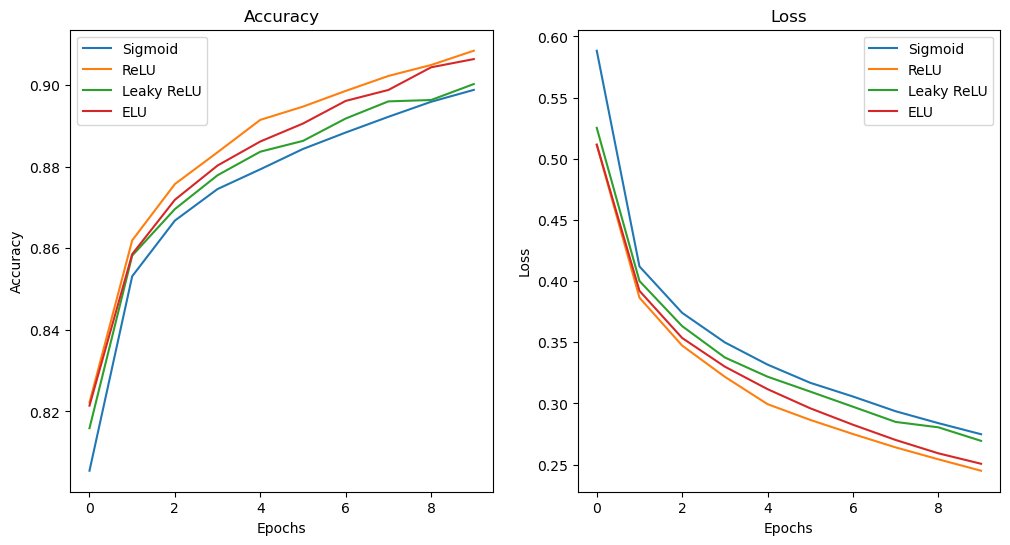

In [33]:
# Comparar resultados
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_sigmoid.history['accuracy'], label='Sigmoid')
plt.plot(history_relu.history['accuracy'], label='ReLU')
plt.plot(history_leaky_relu.history['accuracy'], label='Leaky ReLU')
plt.plot(history_elu.history['accuracy'], label='ELU')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_sigmoid.history['loss'], label='Sigmoid')
plt.plot(history_relu.history['loss'], label='ReLU')
plt.plot(history_leaky_relu.history['loss'], label='Leaky ReLU')
plt.plot(history_elu.history['loss'], label='ELU')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


**Conclusiones**: La forma más eficaz de comparar los resultados de las métricas entre las distitnas funciones de activación, es mediante el uso de representaciones gráficas. De este modo, se puede observar con claridad como la función Sigmoid es la que presenta peores métricas; frente a las que mejor resultados han obtenido, en este caso ReLU y ELU.

## 10. Inicialización de parámetros

In [34]:
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import Zeros, RandomNormal, GlorotUniform

# Crear modelo con diferentes estrategias de inicialización

model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu', kernel_initializer=Zeros()),
        Dense(10, activation='softmax')
    ])

model.compile(optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])
    
history_zeros = model.fit(training_images, training_labels,
        epochs=10, 
        batch_size=64,
        validation_data=(test_images, test_labels),
        verbose=1)


Epoch 1/10
938/938 [==============================] - 1s 1ms/step - loss: 2.3027 - accuracy: 0.0984 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
938/938 [==============================] - 1s 950us/step - loss: 2.3027 - accuracy: 0.0979 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
938/938 [==============================] - 1s 949us/step - loss: 2.3027 - accuracy: 0.0986 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
938/938 [==============================] - 1s 950us/step - loss: 2.3027 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
938/938 [==============================] - 1s 937us/step - loss: 2.3027 - accuracy: 0.0986 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
938/938 [==============================] - 1s 933us/step - loss: 2.3027 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
938/938 [==============================] - 1s 943us/step - loss: 2.3027 - accuracy: 0.0968 - val_loss: 2.3026 - val_accuracy: 0

In [35]:
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import Zeros, RandomNormal, GlorotUniform

# Crear modelo con diferentes estrategias de inicialización

model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu', kernel_initializer=RandomNormal()),
        Dense(10, activation='softmax')
    ])

model.compile(optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])
    
history_random_normal = model.fit(training_images, training_labels,
        epochs=10,
        batch_size=64,
        validation_data=(test_images, test_labels),
        verbose=1)


Epoch 1/10
938/938 [==============================] - 1s 1ms/step - loss: 0.5170 - accuracy: 0.8203 - val_loss: 0.4425 - val_accuracy: 0.8444
Epoch 2/10
938/938 [==============================] - 1s 946us/step - loss: 0.3861 - accuracy: 0.8624 - val_loss: 0.4129 - val_accuracy: 0.8496
Epoch 3/10
938/938 [==============================] - 1s 948us/step - loss: 0.3485 - accuracy: 0.8747 - val_loss: 0.3742 - val_accuracy: 0.8655
Epoch 4/10
938/938 [==============================] - 1s 947us/step - loss: 0.3232 - accuracy: 0.8831 - val_loss: 0.3715 - val_accuracy: 0.8635
Epoch 5/10
938/938 [==============================] - 1s 948us/step - loss: 0.3050 - accuracy: 0.8884 - val_loss: 0.3579 - val_accuracy: 0.8735
Epoch 6/10
938/938 [==============================] - 1s 945us/step - loss: 0.2902 - accuracy: 0.8927 - val_loss: 0.3583 - val_accuracy: 0.8668
Epoch 7/10
938/938 [==============================] - 1s 948us/step - loss: 0.2774 - accuracy: 0.8986 - val_loss: 0.3549 - val_accuracy: 0

In [36]:
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import Zeros, RandomNormal, GlorotUniform

# Crear modelo con diferentes estrategias de inicialización

model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu', kernel_initializer=GlorotUniform()),
        Dense(10, activation='softmax')
    ])

model.compile(optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])
    
history_glorot_uniform = model.fit(training_images, training_labels,
        epochs=10,
        batch_size=64,
        validation_data=(test_images, test_labels),
        verbose=1)


Epoch 1/10
938/938 [==============================] - 1s 1ms/step - loss: 0.5200 - accuracy: 0.8194 - val_loss: 0.4448 - val_accuracy: 0.8415
Epoch 2/10
938/938 [==============================] - 1s 944us/step - loss: 0.3881 - accuracy: 0.8607 - val_loss: 0.4255 - val_accuracy: 0.8504
Epoch 3/10
938/938 [==============================] - 1s 941us/step - loss: 0.3467 - accuracy: 0.8748 - val_loss: 0.4074 - val_accuracy: 0.8591
Epoch 4/10
938/938 [==============================] - 1s 937us/step - loss: 0.3204 - accuracy: 0.8823 - val_loss: 0.3548 - val_accuracy: 0.8712
Epoch 5/10
938/938 [==============================] - 1s 939us/step - loss: 0.3031 - accuracy: 0.8892 - val_loss: 0.3678 - val_accuracy: 0.8687
Epoch 6/10
938/938 [==============================] - 1s 940us/step - loss: 0.2873 - accuracy: 0.8949 - val_loss: 0.3438 - val_accuracy: 0.8764
Epoch 7/10
938/938 [==============================] - 1s 918us/step - loss: 0.2751 - accuracy: 0.8984 - val_loss: 0.3362 - val_accuracy: 0

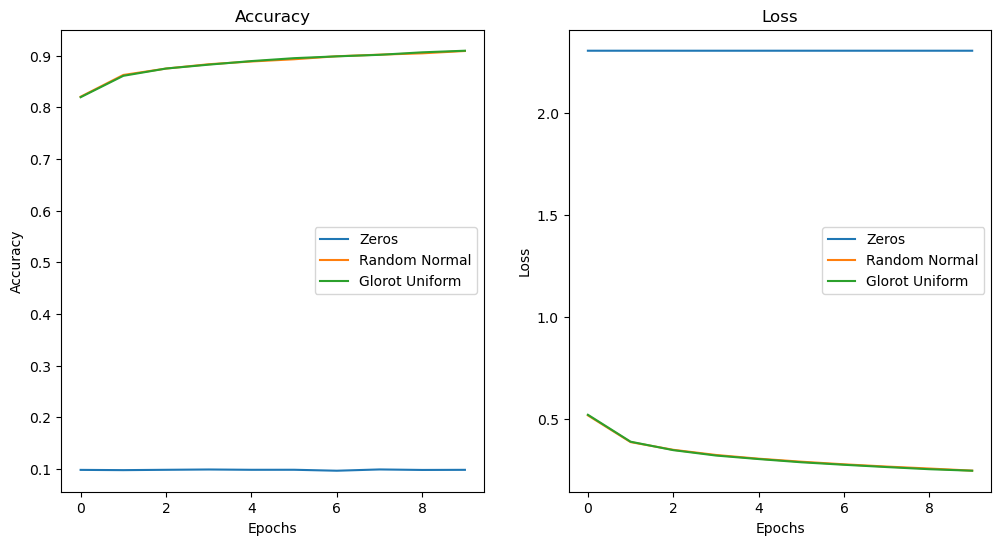

In [37]:
### Zeros vs. Random Normal vs. Glorot Uniform

# Comparar resultados
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_zeros.history['accuracy'], label='Zeros')
plt.plot(history_random_normal.history['accuracy'], label='Random Normal')
plt.plot(history_glorot_uniform.history['accuracy'], label='Glorot Uniform')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_zeros.history['loss'], label='Zeros')
plt.plot(history_random_normal.history['loss'], label='Random Normal')
plt.plot(history_glorot_uniform.history['loss'], label='Glorot Uniform')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


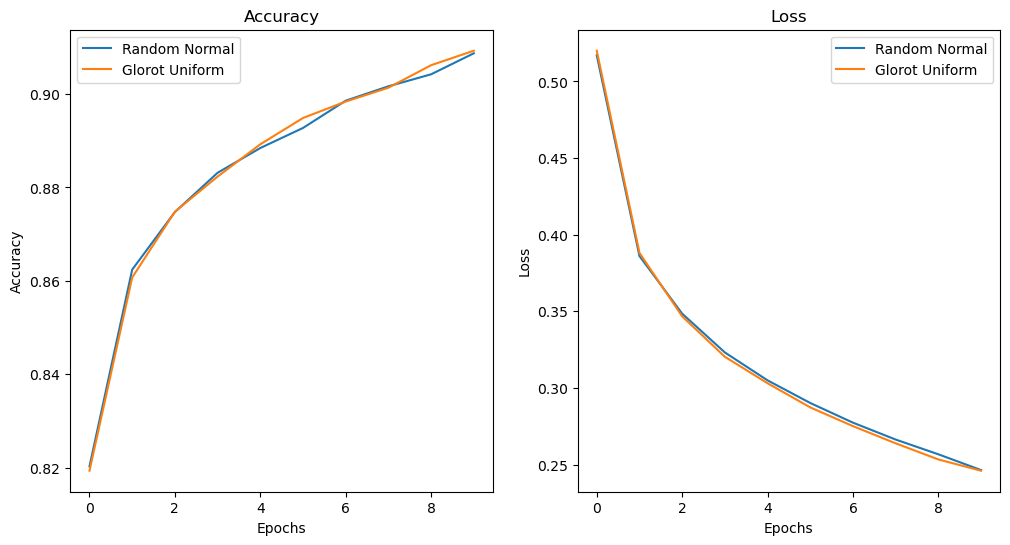

In [38]:
### Random Normal vs. Glorot Uniform

# Comparar resultados
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_random_normal.history['accuracy'], label='Random Normal')
plt.plot(history_glorot_uniform.history['accuracy'], label='Glorot Uniform')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_random_normal.history['loss'], label='Random Normal')
plt.plot(history_glorot_uniform.history['loss'], label='Glorot Uniform')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

**Conclusiones**: De la misma forma que en el apartado anterior, se ha decidido representar los resultados de forma gráfica. Se observa como la estrategia Random Normal y Glorot Uniform proporcionan unos resultados mucho mejores que Zeros, que inicializa los pesos de las neuronas a cero. Lo que demuestra que la estrategia de inicialización a usar en la red neuronal, influye considerablemente en los resultados.

## 11. Optimizadores

In [40]:
### Optimizers SGD vs. Adam vs. RMSprop

from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.initializers import RandomNormal

# Crear modelo con diferentes optimizadores

model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu', kernel_initializer=RandomNormal()),
        Dense(10, activation='softmax')
    ])

model.compile(optimizer=SGD(),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])
    
history_sgd = model.fit(training_images, training_labels,
        epochs=10,
        batch_size=64,
        validation_data=(test_images, test_labels),
        verbose=1)


Epoch 1/10
938/938 [==============================] - 1s 944us/step - loss: 0.8844 - accuracy: 0.7144 - val_loss: 0.6586 - val_accuracy: 0.7787
Epoch 2/10
938/938 [==============================] - 1s 872us/step - loss: 0.5878 - accuracy: 0.8053 - val_loss: 0.5741 - val_accuracy: 0.8068
Epoch 3/10
938/938 [==============================] - 1s 867us/step - loss: 0.5263 - accuracy: 0.8230 - val_loss: 0.5325 - val_accuracy: 0.8173
Epoch 4/10
938/938 [==============================] - 1s 840us/step - loss: 0.4930 - accuracy: 0.8317 - val_loss: 0.5147 - val_accuracy: 0.8228
Epoch 5/10
938/938 [==============================] - 1s 833us/step - loss: 0.4721 - accuracy: 0.8374 - val_loss: 0.4903 - val_accuracy: 0.8291
Epoch 6/10
938/938 [==============================] - 1s 832us/step - loss: 0.4567 - accuracy: 0.8421 - val_loss: 0.4904 - val_accuracy: 0.8240
Epoch 7/10
938/938 [==============================] - 1s 833us/step - loss: 0.4443 - accuracy: 0.8462 - val_loss: 0.4703 - val_accuracy:

In [41]:
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.initializers import RandomNormal

# Crear modelo con diferentes optimizadores

model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu', kernel_initializer=RandomNormal()),
        Dense(10, activation='softmax')
    ])

model.compile(optimizer=Adam(),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])
    
history_adam = model.fit(training_images, training_labels,
        epochs=10,
        batch_size=64,
        validation_data=(test_images, test_labels),
        verbose=1)

Epoch 1/10
938/938 [==============================] - 1s 1ms/step - loss: 0.5214 - accuracy: 0.8184 - val_loss: 0.4345 - val_accuracy: 0.8501
Epoch 2/10
938/938 [==============================] - 1s 953us/step - loss: 0.3865 - accuracy: 0.8633 - val_loss: 0.4121 - val_accuracy: 0.8532
Epoch 3/10
938/938 [==============================] - 1s 943us/step - loss: 0.3446 - accuracy: 0.8765 - val_loss: 0.4174 - val_accuracy: 0.8550
Epoch 4/10
938/938 [==============================] - 1s 934us/step - loss: 0.3203 - accuracy: 0.8831 - val_loss: 0.3535 - val_accuracy: 0.8713
Epoch 5/10
938/938 [==============================] - 1s 948us/step - loss: 0.3014 - accuracy: 0.8905 - val_loss: 0.3597 - val_accuracy: 0.8707
Epoch 6/10
938/938 [==============================] - 1s 951us/step - loss: 0.2859 - accuracy: 0.8946 - val_loss: 0.3539 - val_accuracy: 0.8756
Epoch 7/10
938/938 [==============================] - 1s 951us/step - loss: 0.2746 - accuracy: 0.8988 - val_loss: 0.3491 - val_accuracy: 0

In [42]:
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.initializers import RandomNormal

# Crear modelo con diferentes optimizadores

model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu', kernel_initializer=RandomNormal()),
        Dense(10, activation='softmax')
    ])

model.compile(optimizer=RMSprop(),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])
    
history_rmsprop = model.fit(training_images, training_labels,
        epochs=10,
        batch_size=64,
        validation_data=(test_images, test_labels),
        verbose=1)


Epoch 1/10
938/938 [==============================] - 1s 993us/step - loss: 0.5339 - accuracy: 0.8109 - val_loss: 0.4829 - val_accuracy: 0.8269
Epoch 2/10
938/938 [==============================] - 1s 928us/step - loss: 0.3896 - accuracy: 0.8599 - val_loss: 0.4751 - val_accuracy: 0.8295
Epoch 3/10
938/938 [==============================] - 1s 936us/step - loss: 0.3468 - accuracy: 0.8748 - val_loss: 0.4178 - val_accuracy: 0.8497
Epoch 4/10
938/938 [==============================] - 1s 934us/step - loss: 0.3212 - accuracy: 0.8828 - val_loss: 0.3640 - val_accuracy: 0.8698
Epoch 5/10
938/938 [==============================] - 1s 916us/step - loss: 0.3036 - accuracy: 0.8896 - val_loss: 0.3631 - val_accuracy: 0.8749
Epoch 6/10
938/938 [==============================] - 1s 928us/step - loss: 0.2905 - accuracy: 0.8944 - val_loss: 0.3626 - val_accuracy: 0.8770
Epoch 7/10
938/938 [==============================] - 1s 925us/step - loss: 0.2793 - accuracy: 0.8985 - val_loss: 0.3602 - val_accuracy:

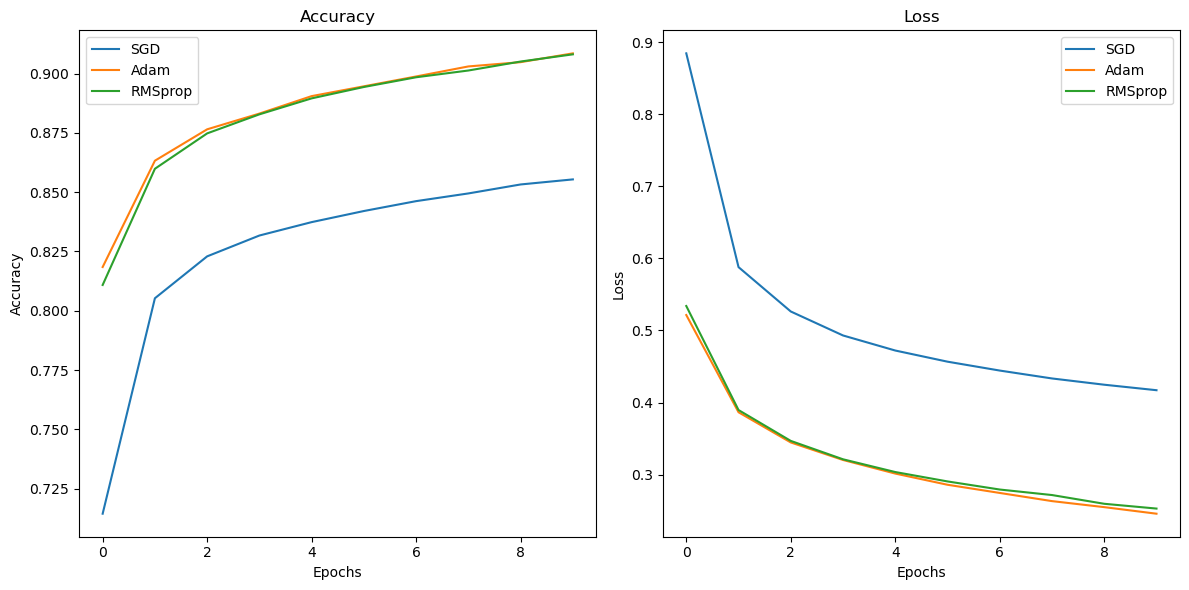

In [43]:
### Optimizers SGD vs. Adam vs. RMSprop

# Comparar resultados
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_sgd.history['accuracy'], label='SGD')
plt.plot(history_adam.history['accuracy'], label='Adam')
plt.plot(history_rmsprop.history['accuracy'], label='RMSprop')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_sgd.history['loss'], label='SGD')
plt.plot(history_adam.history['loss'], label='Adam')
plt.plot(history_rmsprop.history['loss'], label='RMSprop')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

**Conclusiones**: Se observa en las gráficas como SGD es el optimizador que ofrece peores resultados según las métricas obtenidas, mientras que Adam y RMSprop proporcionar resultados similares. Sería importante ajustar los parámetros de los optimizadores para poder así ajustarlos más al problema planteado, y obtener así unos resultados más precisos. Al hacer uso de Fashion MNIST, tanto Adam como RMSprop serían buenas opciones ya que convergen más rápido y de manera más eficiente.

## 12. Regularización y red final *(1.25 puntos)*

Para llegar al modelo final de red neuronal, se han entrenado distintos modelos modificado parámetros que se indican a continuación:

- Número de capas ocultas (2 capas, 3 capas, 4 capas)
- Número de neuronas en cada capa (512, 256, 128, 64, 32)
- Regularizador l2 utilizado (0.01, 0.001, 0.001)
- Funciones de activación (relu, elu, sigmoid)
- Optimizadores (Adam, RMSprop)
- Uso de BatchNormalization() después de cada capa
- Uso de Dropout() después de cada capa (0.1, 0.2, 0.3, 0.5)

De este modo, se ha llegado a utilizar una combinación de estos parámetros, que intente ser lo más eficiente posible, buscando un equilibrio entre carga computacional, tiempo empleado y rendimiento.

In [45]:
from tensorflow.keras.layers import Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

# Definir la arquitectura del modelo
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(64, activation='relu', kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Definir early stopping para evitar overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Entrenar el modelo
history = model.fit(training_images, training_labels, 
                    validation_data=(test_images, test_labels),
                    epochs=50,
                    batch_size=64,
                    callbacks=[early_stopping],
                    verbose=1)


Epoch 1/50
938/938 [==============================] - 2s 2ms/step - loss: 0.9209 - accuracy: 0.6969 - val_loss: 0.5739 - val_accuracy: 0.8045
Epoch 2/50
938/938 [==============================] - 1s 2ms/step - loss: 0.5876 - accuracy: 0.8072 - val_loss: 0.4965 - val_accuracy: 0.8315
Epoch 3/50
938/938 [==============================] - 1s 2ms/step - loss: 0.5165 - accuracy: 0.8283 - val_loss: 0.4607 - val_accuracy: 0.8430
Epoch 4/50
938/938 [==============================] - 1s 1ms/step - loss: 0.4844 - accuracy: 0.8396 - val_loss: 0.4404 - val_accuracy: 0.8529
Epoch 5/50
938/938 [==============================] - 1s 1ms/step - loss: 0.4586 - accuracy: 0.8480 - val_loss: 0.4286 - val_accuracy: 0.8556
Epoch 6/50
938/938 [==============================] - 1s 1ms/step - loss: 0.4393 - accuracy: 0.8531 - val_loss: 0.4166 - val_accuracy: 0.8595
Epoch 7/50
938/938 [==============================] - 1s 1ms/step - loss: 0.4233 - accuracy: 0.8585 - val_loss: 0.4064 - val_accuracy: 0.8617
Epoch 

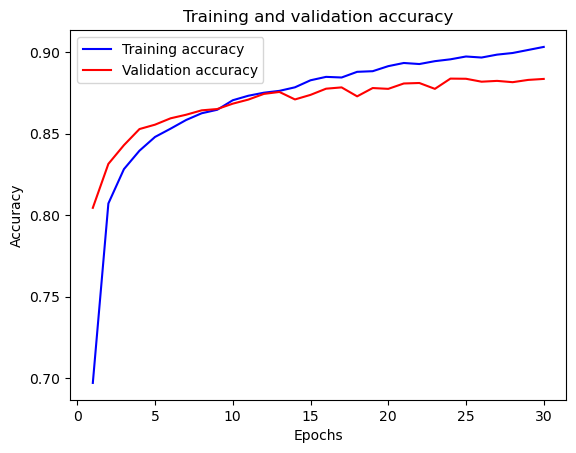

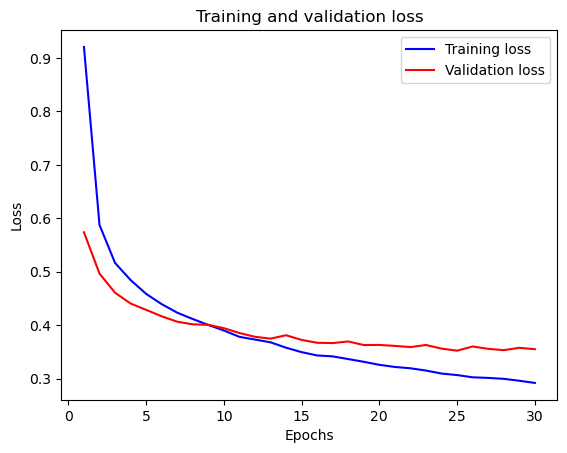

In [46]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_accuracy) + 1)

# Gráfica de accuracy
plt.plot(epochs, train_accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Gráfica de loss
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
